In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
fraud_df = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv')

In [4]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


This set of data has over 6 million entries, may be best to sample size the data for smooth processing. 

In [4]:
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
fraud_df.columns 

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
fraud_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
# sample sizing data for smoother processing 

fraud_new_df = fraud_df.sample(n=10000)

**Univariate Analysis**

Gauge distributions within the dataset and identify any outliers 

**Bivariate Analysis**

Gauge any relationships between two columns

**Multivariate Analysis**

Gauge relationships between multiple columns  

<function matplotlib.pyplot.show(close=None, block=None)>

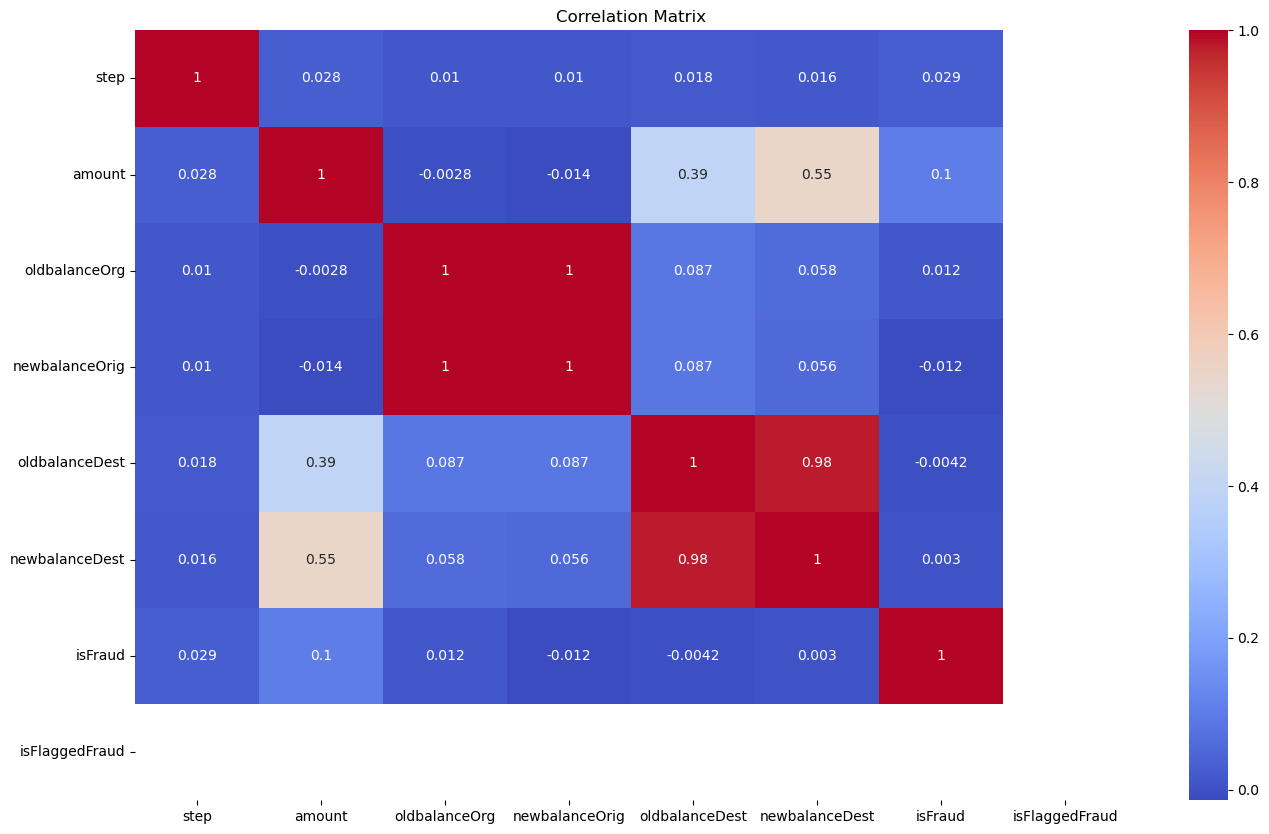

In [6]:
# creating a correlation matrix with only the numeric columns within the dataset

correlation_matrix = fraud_new_df.corr(numeric_only= True)

plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show

In [7]:
# save dataframe as a new csv file to be used in the next step

fraud_new_df.to_csv('../data/fraud_new.csv')